## My First Convolutional Neural Network Project

### The project was done after the completion of Tensorflow in practice Specialization from the coursera platform completed in Dec 2019

The project is a experimentation for the techniques i learned from the course.
I have prepared the data set of 5 distinct object viz,

1.Sneakers

2.Womens Footwear

3.T-Shirts

4.Womens Clothing

5.Eyeglasses


These images were taken from various sources to train the model.
From the data set for every class,400 images were assigned to train i.e saved in the local file in the "train" folder.So the total of 2000 images for 5 classes were trained on the model.

Likewise images which were not assigned to train in model were stored in "Test All" folder which had random images of all 5 classes above.So that the image location was called to check the predictions of the model.

The classes folder were assigned the file name of 1,2,3,4,5 to avoid language bias.

### The model below was trained into consideration of cataloging team to automate the selection of products uploaded by the traders/sellers/distributers to ease listing and labelling.

In [1]:
import os

In [2]:
# This defines the directory with the training products pictures
train_Sneakers_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/1')

train_Womens_Footwear_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/2')

train_T_Shirts_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/3')

train_Womens_Clothing_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/4')

train_Eyeglasses_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/5')

In [3]:
train_Sneakers_names = os.listdir(train_Sneakers_dir)
train_Womens_Footwear_names = os.listdir(train_Womens_Footwear_dir)
train_T_Shirts_names = os.listdir(train_T_Shirts_dir)
train_Womens_Clothing_names = os.listdir(train_Womens_Clothing_dir)
train_Eyeglasses_names = os.listdir(train_Eyeglasses_dir)

# To check the names of items in the directory
print(train_Sneakers_names[:5])
print(train_Womens_Footwear_names[:5])
print(train_T_Shirts_names[:5])
print(train_Womens_Clothing_names[:5])
print(train_Eyeglasses_names[:5])

['Sneakers (1).jpg', 'Sneakers (10).jpg', 'Sneakers (100).jpg', 'Sneakers (101).jpg', 'Sneakers (102).jpg']
['Womens Footwear (1).jpg', 'Womens Footwear (10).jpg', 'Womens Footwear (100).jpg', 'Womens Footwear (101).jpg', 'Womens Footwear (102).jpg']
['T_Shirts (1).jpg', 'T_Shirts (10).jpg', 'T_Shirts (100).jpg', 'T_Shirts (101).jpg', 'T_Shirts (102).jpg']
['Womens Clothing (1).jpg', 'Womens Clothing (10).jpg', 'Womens Clothing (100).jpg', 'Womens Clothing (101).jpg', 'Womens Clothing (102).jpg']
['Eyeglasses  (1).jpg', 'Eyeglasses  (10).jpg', 'Eyeglasses  (100).jpg', 'Eyeglasses  (101).jpg', 'Eyeglasses  (102).jpg']


In [4]:
# we confirm the total number of items in the list by calling on the len function
print('total training Sneakers images:', len(os.listdir(train_Sneakers_dir)))
print('total training Womens Footwear images:', len(os.listdir(train_Womens_Footwear_dir)))
print('total training T-Shirts images:', len(os.listdir(train_T_Shirts_dir)))
print('total training Womens Clothing images:', len(os.listdir(train_Womens_Clothing_dir)))
print('total training Eyeglasses images:', len(os.listdir(train_Eyeglasses_dir)))

total training Sneakers images: 400
total training Womens Footwear images: 400
total training T-Shirts images: 400
total training Womens Clothing images: 400
total training Eyeglasses images: 400


In [5]:
# We visually inspect the random images in the train folder for all 5 classes
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 14
ncols = 4

# Index for iterating over images
pic_index = 0

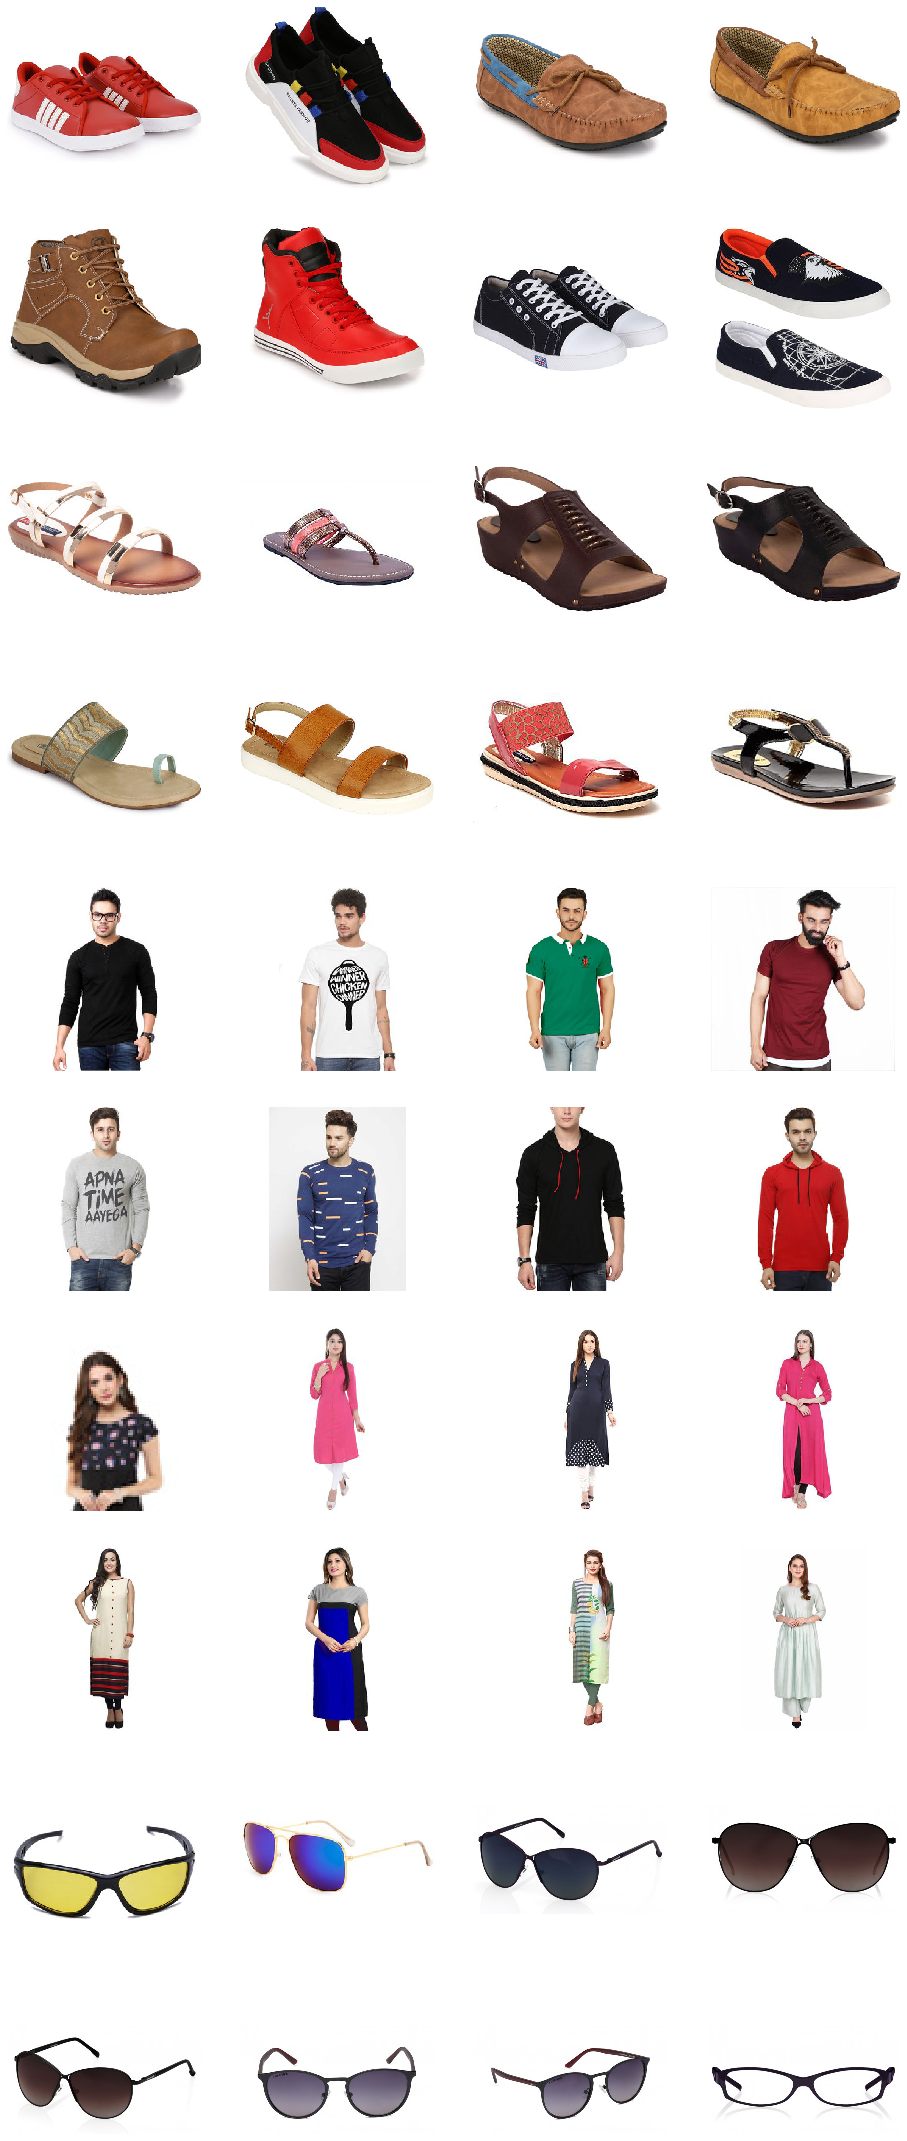

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_Sneakers_pix = [os.path.join(train_Sneakers_dir, fname) 
                for fname in train_Sneakers_names[pic_index-8:pic_index]]
next_Womens_Footwear_pix = [os.path.join(train_Womens_Footwear_dir, fname) 
                for fname in train_Womens_Footwear_names[pic_index-8:pic_index]]
next_T_Shirts_pix = [os.path.join(train_T_Shirts_dir, fname) 
                for fname in train_T_Shirts_names[pic_index-8:pic_index]]
next_Womens_Clothing_pix = [os.path.join(train_Womens_Clothing_dir, fname) 
                for fname in train_Womens_Clothing_names[pic_index-8:pic_index]]
next_Eyeglasses_pix = [os.path.join(train_Eyeglasses_dir, fname) 
                for fname in train_Eyeglasses_names[pic_index-8:pic_index]]



for i, img_path in enumerate(next_Sneakers_pix+next_Womens_Footwear_pix+next_T_Shirts_pix+next_Womens_Clothing_pix+next_Eyeglasses_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf

In [8]:
# Instantiating a callback to end training after the accuarcy of 96% is reached
callback_accuracy = 0.96

class myCallback(tf.keras.callbacks.Callback):
          def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')> callback_accuracy):
                  print("\nReached 96% accuracy so cancelling training!")
                  self.model.stop_training = True 

callbacks = myCallback()

In [9]:
# As the training images contains various images of different shape and size,
# we change to a common input shape of 150*150 and use 5 convolutions layers
model = tf.keras.models.Sequential([
    # This is the 1st convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The 2nd convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The 3rd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The 4th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The 5th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # I flatten the images to feed into DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    # As there are 5 types/classes of products,we we take 5 as final dense and
    # activation as softmax,for multiple classification
    tf.keras.layers.Dense(5, activation='softmax')
])

In [10]:
# In the summary ,the number of parameter to train are explored
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling all images by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/Bhavesh/Desktop/Fashion Classifier/Train', #source directory for training images  
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        class_mode ='categorical')
        

Found 2000 images belonging to 5 classes.


In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=100,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/100
5/5 [==============================] - 7s 1s/step - loss: 1.6008 - acc: 0.2625
Epoch 2/100
5/5 [==============================] - 6s 1s/step - loss: 1.5949 - acc: 0.2875
Epoch 3/100
5/5 [==============================] - 6s 1s/step - loss: 1.5927 - acc: 0.3000
Epoch 4/100
5/5 [==============================] - 6s 1s/step - loss: 1.5883 - acc: 0.2000
Epoch 5/100
5/5 [==============================] - 6s 1s/step - loss: 1.5494 - acc: 0.2875
Epoch 6/100
5/5 [==============================] - 6s 1s/step - loss: 1.4759 - acc: 0.4000
Epoch 7/100
5/5 [==============================] - 6s 1s/step - loss: 1.3800 - acc: 0.3875
Epoch 8/100
5/5 [==============================] - 6s 1s/step - loss: 1.2272 - acc: 0.5938
Epoch 9/100
5/5 [==============================] - 6s 1s/step - loss: 1.0556 - acc: 0.6187
Epoch 10/100
5/5 [==============================] - 6s 1s/step - loss: 1.1819 - acc: 0.5000
Epoch 11/100
5/5 [==============================] - 6s 1s/step - loss: 1.0891 - acc: 0.58

In [14]:
# Here we visualize the the training Loss and accuracy with respective to each epoch
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

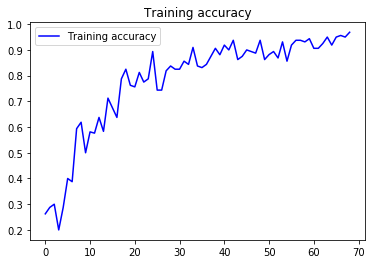

In [15]:
# For Training Accuracy versus Epochs
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.legend()
plt.show()

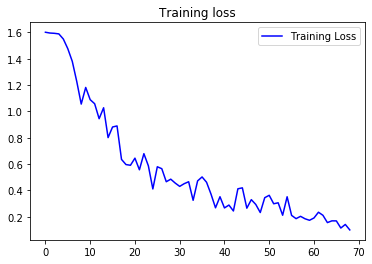

In [16]:
# For Training loss versus Epochs
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#### We import PIL and Numpy to convert the test/uploaded images into desired shape of array and use vstack (similar to flatten in the training model) to stack the sequence of input arrays vertically to make a single array.

In [17]:
import numpy as np
from keras_preprocessing import image
from PIL import Image

In [18]:
# Defining a function to call for predicting the images
def Fashion_Classifer(Image_Location):

    path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location)
    #converting the uploaded images or the test images in the input shape of 150
    #so thats compatible with our model
    img = Image.open(path)
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    x = classes
    x = x.ravel()
    y = np.argmax(x)
    if y == 0:
        print('The image uploaded is a Sneaker')
    elif y == 1:
        print('The image uploaded is a Womens footwear')
    elif y == 2:
        print('The image uploaded is a T_Shirts')
    elif y == 3:
        print('The image uploaded is a Womens clothing')
    else:
        print('The image uploaded is a Eyeglass')

In [19]:
# this is the location of images in the folder "Test All" that i have in 
# my dataset
Image_Location_1 = 78

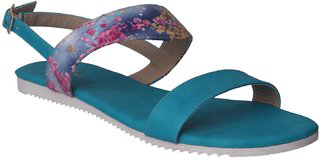

In [20]:
# Visually check the image from the test folder to cross check accuracy 
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_1)
img = Image.open(path)
img

In [21]:
Fashion_Classifer(Image_Location_1)

The image uploaded is a Womens footwear


### As i have 300 images in test folder,i choose to upload images at the index value randomly to avoid any bias in image selection manually.
### I use np.random.randint() to get random value from 1 to 300,and feed it to image_location_2 onwards to get a clear view of the models accuracy

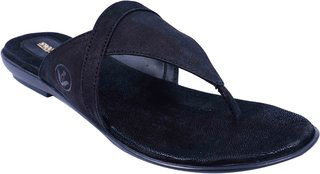

In [22]:
Image_Location_2 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_2)
img = Image.open(path)
img

In [23]:
Fashion_Classifer(Image_Location_2)

The image uploaded is a Womens footwear


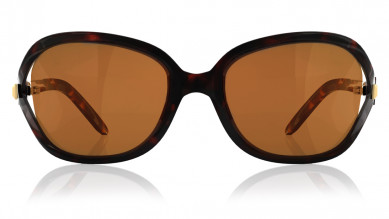

In [24]:
Image_Location_3 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_3)
img = Image.open(path)
img

In [25]:
Fashion_Classifer(Image_Location_3)

The image uploaded is a Eyeglass


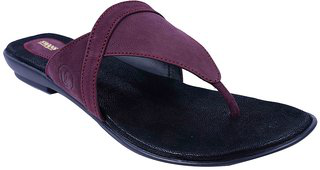

In [26]:
Image_Location_4 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_4)
img = Image.open(path)
img

In [27]:
Fashion_Classifer(Image_Location_4)

The image uploaded is a Womens footwear


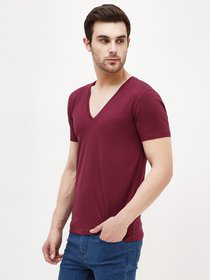

In [28]:
Image_Location_5 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_5)
img = Image.open(path)
img

In [29]:
Fashion_Classifer(Image_Location_5)

The image uploaded is a Womens clothing


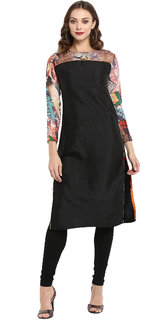

In [30]:
Image_Location_6 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_6)
img = Image.open(path)
img

In [31]:
Fashion_Classifer(Image_Location_6)

The image uploaded is a Womens clothing


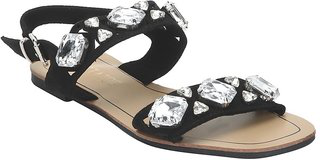

In [32]:
Image_Location_7 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_7)
img = Image.open(path)
img

In [33]:
Fashion_Classifer(Image_Location_7)

The image uploaded is a Womens footwear


162


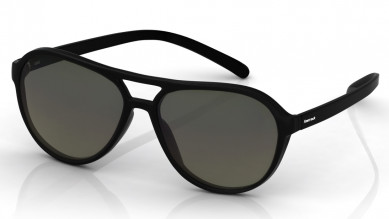

In [34]:
Image_Location_8 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_8)
img = Image.open(path)
print(Image_Location_8)
img

In [35]:
Fashion_Classifer(Image_Location_8)

The image uploaded is a Eyeglass


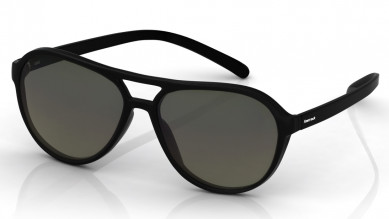

In [36]:
Image_Location_9 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_9)
img = Image.open(path)
img

In [37]:
Fashion_Classifer(Image_Location_9)

The image uploaded is a Eyeglass


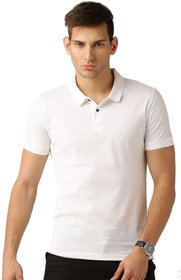

In [38]:
Image_Location_10 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_10)
img = Image.open(path)
img

In [39]:
Fashion_Classifer(Image_Location_10)

The image uploaded is a T_Shirts
